In [284]:
import numpy as np 
import pandas as pd 
import featuretools as ft

In [2]:
trn_id = pd.read_csv("/home/sid2018-1/Bureau/kaggle_fraud/data/train_identity.csv")
trn_tr = pd.read_csv("/home/sid2018-1/Bureau/kaggle_fraud/data/train_transaction.csv")
test_id= pd.read_csv("/home/sid2018-1/Bureau/kaggle_fraud/data/test_identity.csv")
test_tr= pd.read_csv("/home/sid2018-1/Bureau/kaggle_fraud/data/test_transaction.csv")

In [281]:
test_tr.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
test_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


**Analysis of the pandas-profiling outputs**

###### identity dataframre

In [3]:
## we can see that DeviceInfo has a high cardinality: 1787 distinct values. 
## Let's see now how is it distributed on the train and test dataset ??? 

In [285]:
train0 = pd.merge(trn_id, trn_tr, on = 'TransactionID', how = 'right')


In [4]:
train = pd.merge(trn_id, trn_tr, on = 'TransactionID')
test = pd.merge(test_id, test_tr, on = 'TransactionID')

In [5]:
train.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train.shape

(144233, 434)

In [7]:
#import pandas_profiling as pp
#profile = train.profile_report()
#profile.to_file(output_file="train.html")

In [8]:
cols = 'C10, C11,C12 ,C13, C14, C2, C4, C5, C6, C7, C8, C9, D11, D2, D4, D6, D7, dist1, M1 ,M2, M3, M5, M6, M7, M8, M9, V1, V10, V102, V103,V105, V106, V109, V11, V110, V112, V113, V115, V116, V118, V119, V121, V122, V125, V126, V127, V128, V132, V133, V134, V137,V140, V143, V145, V147, V149, V150, V151, V152, V153, V154, V155, V156, V157, V158, V159, V16, V160, V163,V164, V167, V168 ,V177, V178, V179, V18, V182, V183, V190, V192, V193, V196, V197, V198, V199, V2, V20, V201, V202, V203, V204, V206, V207, V211,V212 ,V213, V216, V217, V218, V219, V222, V225, V231 ,V232, V233, V235, V236, V237, V239, V24, V243, V245, V249, V251, V253, V254,V256 ,V257, V259, V263, V265, V266, V269, V271, V272, V273, V274, V275, V276, V277, V278, V279, V28, V280, V287, V289, V292, V293, V294,V295 ,V296, V297, V298, V299, V3, V301, V306, V307, V308, V309, V310, V311, V312, V315, V316, V317, V318, V32, V321, V322, V323, V324,V325 ,V326, V327, V328, V329, V33, V330, V331, V332, V333, V334, V336, V339, V34, V4, V41, V45, V5, V6, V65, V68, V7, V74, V8, V88, V89, V9,V94, V95, V96, V97, V98, V99'

In [9]:
cols_to_delete = cols.replace(' ','').split(",")

In [10]:
train1 = train.drop(cols_to_delete, axis = 1)

In [199]:
test1 = test.drop(cols_to_delete, axis = 1)

In [11]:
train1.shape

(144233, 239)

In [200]:
test1.shape

(141907, 238)

In [12]:
train1['addr1'].values

array([420., 337.,  nan, ...,  nan, 337.,  nan])

In [13]:
df= train1[['addr1','isFraud']].dropna()

In [14]:
df1 =  df.groupby(['addr1']).sum()

In [15]:
df1['per'] = [df1['isFraud'][x] / list(df['addr1'].values).count(x) for x in df1.index]
df1['count'] = [ list(df['addr1'].values).count(x) for x in df1.index]

In [16]:
df1.loc[df1['per'] >= 0.3]


,isFraud,per,count
addr1,,,
199.0,1,1.000000,1
260.0,2,0.666667,3
305.0,3,0.600000,5
391.0,15,0.535714,28
431.0,13,0.382353,34
483.0,10,0.555556,18
501.0,2,0.666667,3


In [17]:
df1.boxplot()

In [39]:
def percentage(df, att):
    df1= df[[att,'isFraud']].dropna()
    df1 =  df1.groupby([att]).sum()
    df1['per'] = [df1['isFraud'][x] / list(df[att].values).count(x) for x in df1.index]
    df1['count'] = [ list(df[att].values).count(x) for x in df1.index]
    return (df1)
    

In [19]:
percentage(train1,'addr2').loc[percentage(train1,'addr2')['per'] >= 0.3]


,isFraud,per,count
addr2,,,
10.0,8,1.000000,8
36.0,1,0.500000,2
38.0,2,0.666667,3
46.0,3,1.000000,3
51.0,4,1.000000,4
54.0,2,0.333333,6
65.0,44,0.536585,82
75.0,1,1.000000,1
82.0,1,1.000000,1


In [272]:
listenan = ['M4','addr1','addr2','C3','C5','C9','D10', 'D11', 'D12','D13','D14','D15', 'D3', 'D5', 'D8','D9','DeviceInfo','dist1','dist2','id_03','id_04','id_09','id_07','id_08','id_10','id_14','id_18','id_21','id_22','id_23','id_24','id_25','id_26','id_27','id_30','id_32','id_33','id_34','M1','M2','M3','M5','M6','M7','M8','M9','V1','V10','V100','V101','V104','V11','V12','V13','V138','V139','V14','V141','V142','V144','V146','V148','V15','V161','V162','V165','V166','V169','V17','V19','V2','V21','V22','V23','V25','V255','V26','V27','V29','V3','V30','V31','V335','V337','V338','V35','V36','V37','V38','V39','V40','V42','V43','V44','V50','V46','V47','V48','V49','V5','V51','V52','V53','V54','V55','V56','V57','V58','V59','V60','V6','V61','V62','V63','V64','V70','V66','V67','V71','V69','V7','V72','V73','V80','V75','V76','V77','V78','V79','V8','V81','V82','V83','V84','V85','V86','V87','V9','V90','V91','V92','V93']

In [36]:
train2 = train1
for x in listenan:
     if x in train1.columns:
            train2=  train2.drop([x], axis = 1)

In [201]:
for x in listenan:
     if x in test1.columns:
            test1=  test1.drop([x], axis = 1)

In [37]:
train2.shape

(144233, 121)

In [202]:
test1.shape

(141907, 119)

In [38]:
train2.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,...,V291,V300,V302,V303,V304,V305,V313,V314,V319,V320
0,2987004,0.0,70787.0,NaN,NaN,100.0,NotFound,NaN,New,NotFound,...,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,NotFound,49.0,New,NotFound,...,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000
2,2987010,-5.0,191631.0,0.0,0.0,100.0,NotFound,52.0,Found,Found,...,4.0,1.0,1.0,1.0,1.0,1.0,90.327904,90.327904,75.887497,75.887497
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,NotFound,52.0,New,NotFound,...,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000
4,2987016,0.0,7460.0,1.0,0.0,100.0,NotFound,NaN,Found,Found,...,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000


In [41]:
percentage(train2,'card4').head()


,isFraud,per,count
card4,,,
american express,239,0.028802,8298
discover,177,0.078111,2266
mastercard,3920,0.088716,44186
visa,6968,0.078030,89299


Ceci n'est donc pas un feature tres important mais on le garde quand meme en dummies

In [42]:
percentage(train2,'card6').head()


,isFraud,per,count
card6,,,
charge card,0,0.000000,15
credit,6693,0.089133,75090
debit,4613,0.066904,68950


Ceci n'est donc pas un feature tres important mais on le garde quand meme en dummies

In [129]:
percentage(train2,'DeviceType')

,isFraud,per,count
DeviceType,,,
desktop,5554,0.065215,85165
mobile,5657,0.101662,55645


In [45]:
percentage(train2,'id_12').head()

,isFraud,per,count
id_12,,,
Found,1269,0.059836,21208
NotFound,10049,0.081683,123025


In [46]:
percentage(train2,'id_15').head()

,isFraud,per,count
id_15,,,
Found,7118,0.105097,67728
New,3034,0.049244,61612
Unknown,1070,0.091885,11645


In [47]:
percentage(train2,'id_16').head()

,isFraud,per,count
id_16,,,
Found,7112,0.107231,66324
NotFound,3040,0.048242,63016


In [48]:
percentage(train2,'id_28').head()

,isFraud,per,count
id_28,,,
Found,7833,0.102752,76232
New,3385,0.052281,64746


In [49]:
percentage(train2,'id_29').head()

,isFraud,per,count
id_29,,,
Found,7827,0.104463,74926
NotFound,3391,0.051338,66052


In [127]:
(percentage(train2,'id_31'))

,isFraud,per,count
id_31,,,
BLU/Dash,0,0.000000,1
Cherry,0,0.000000,1
Generic/Android,7,0.122807,57
Generic/Android 7.0,16,0.197531,81
Inco/Minion,0,0.000000,1
LG/K-200,0,0.000000,1
Lanix/Ilium,2,0.666667,3
M4Tel/M4,0,0.000000,1
Microsoft/Windows,0,0.000000,25


In [51]:
percentage(train2,'id_35').head()

,isFraud,per,count
id_35,,,
F,7745,0.122604,63171
T,3477,0.044683,77814


In [52]:
percentage(train2,'id_36').head()

,isFraud,per,count
id_36,,,
F,10978,0.081885,134066
T,244,0.035265,6919


In [53]:
percentage(train2,'id_37').head()

,isFraud,per,count
id_37,,,
F,2020,0.066158,30533
T,9202,0.083312,110452


In [54]:
percentage(train2,'id_38').head()

,isFraud,per,count
id_38,,,
F,7229,0.097792,73922
T,3993,0.059541,67063


In [271]:
percentage(train2,'M4')

,isFraud,per,count
M4,,,
M0,1167,0.115442,10109
M1,53,0.125592,422
M2,6281,0.124871,50300


In [192]:
percentage(train2,'R_emaildomain')

,isFraud,per,count
R_emaildomain,,,
aim.com,1,0.027778,36
anonymous.com,578,0.029136,19838
aol.com,128,0.034887,3669
att.net,0,0.000000,429
bellsouth.net,2,0.004773,419
cableone.net,0,0.000000,27
centurylink.net,0,0.000000,12
cfl.rr.com,0,0.000000,37
charter.net,5,0.039683,126


In [65]:
percentage(train2,'ProductCD')

,isFraud,per,count
ProductCD,,,
C,7640,0.122845,62192
H,1571,0.047739,32908
R,1423,0.037898,37548
S,684,0.059042,11585


In [58]:
percentage(train2,'V107').head()

,isFraud,per,count
V107,,,
1.0,11313,0.07847,144169


In [59]:
percentage(train2,'V117').head()

,isFraud,per,count
V117,,,
0.0,0,0.000000,1
1.0,11122,0.077321,143841
2.0,191,0.585890,326
3.0,0,0.000000,1


In [63]:
percentage(train2,'V120')

,isFraud,per,count
V120,,,
0.0,0,0.000000,1
1.0,11226,0.077971,143977
2.0,81,0.437838,185
3.0,6,1.000000,6


 Cette variable est à Transformer

In [61]:
percentage(train2,'V305').head()

,isFraud,per,count
V305,,,
1.0,11317,0.078464,144231


In [273]:
def valtocheck(liste, df,s):
    dic = {}
    for col in liste:
        per = df[[col,'isFraud']].loc[(df[col].isna()) & (df['isFraud'] == 1)]['isFraud'].count()/df['isFraud'].sum()
        prop = df[[col,'isFraud']].loc[(df[col].isna()) & (df['isFraud'] == 1)]['isFraud'].count()/df[col].isna().sum()
        if per >s:
            dic[col]= [per, prop]
    return dic


In [278]:
per, prop

(0.3372503975967485, 0.04576628857821155)

In [274]:
per_prop = valtocheck(listenan,train0,0.7)

In [275]:
per_prop

{'D11': [1.0, 0.07847025299342036],
 'D3': [0.7732814984979678, 0.07598937260145519],
 'dist1': [1.0, 0.07847025299342036],
 'id_07': [0.9623608411380102, 0.07831576525403011],
 'id_08': [0.9623608411380102, 0.07831576525403011],
 'id_21': [0.9623608411380102, 0.0783180177459482],
 'id_22': [0.9623608411380102, 0.07832364954265662],
 'id_23': [0.9623608411380102, 0.07832364954265662],
 'id_24': [0.964481357130235, 0.07825874998207706],
 'id_25': [0.9631560346350946, 0.07836751712784236],
 'id_26': [0.9624491959710196, 0.0783274609908679],
 'id_27': [0.9623608411380102, 0.07832364954265662],
 'id_33': [0.7028626965895034, 0.1121306946323861],
 'M1': [1.0, 0.07847025299342036],
 'M2': [1.0, 0.07847025299342036],
 'M3': [1.0, 0.07847025299342036],
 'M5': [1.0, 0.07847025299342036],
 'M6': [1.0, 0.07847025299342036],
 'M7': [1.0, 0.07847025299342036],
 'M8': [1.0, 0.07847025299342036],
 'M9': [1.0, 0.07847025299342036],
 'V1': [1.0, 0.07847025299342036],
 'V10': [1.0, 0.07847025299342036],

In [130]:
todel= ['card6','DeviceType','V107','V305']

In [131]:
train2 = train2.drop(todel, axis=1)

In [203]:
test1 = test1.drop(todel, axis=1)

In [133]:
train2.shape

(144233, 117)

In [137]:
train0.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
listcols = ['V120','V117','ProductCD','id_38','id_35','id_36','id_37','id_12','id_15','id_16','id_28','id_29','card4']

In [190]:
from sklearn import preprocessing
def tranformcols(listcols, train, test):
    for col in listcols:
        le = preprocessing.LabelEncoder()
        le.fit([str(x) for x in train[col].values] +[str(x) for x in test[col].values] )
        test[col] = le.transform([str(x) for x in test[col].values])
        train[col] = le.transform([str(x) for x in train[col].values])
    return train,test

    

In [205]:
train1,test1= tranformcols(listcols, train2, test1)

ValueError: too many values to unpack (expected 2)

In [146]:
navig = ['chrome','firefox', 'samsung', 'google', 'ie', 'edge', 'opera', 'safari']

In [160]:
def lab_navig(navig,df):
    label =[]
    for k,val in enumerate (df['id_31'].values):
        ik = False
        val = str(val).lower()
        for i,j in enumerate (navig):
            if ik == False:
                if j in val:
                    label.append(i)
                    ik = True
        if len(label)== k:
            label.append(8)
        
    return label

In [161]:
len(lab_navig(navig,train0)),len(train0['id_31'].isna())

(144233, 144233)

#### Remaildomain,Pemaildoman

In [194]:
## les virer et utiliser la classif 

In [195]:
def replacena (df):
    for k in df.columns:
        df[k]= df[k].fillna(np.median(df[k].values))
    return (df)

## NLP

In [198]:
! pip install flair

    100% |████████████████████████████████| 184kB 5.3MB/s ta 0:00:01
    100% |████████████████████████████████| 184kB 38.6MB/s ta 0:00:01
    100% |████████████████████████████████| 1.0MB 30.4MB/s ta 0:00:01
    100% |████████████████████████████████| 748.9MB 68kB/s  eta 0:00:012  10% |███▍                            | 78.6MB 29.8MB/s eta 0:00:23    20% |██████▋                         | 154.8MB 7.6MB/s eta 0:01:18    36% |███████████▋                    | 271.5MB 39.7MB/s eta 0:00:13    44% |██████████████▏                 | 331.7MB 57.4MB/s eta 0:00:08
    100% |████████████████████████████████| 51kB 25.8MB/s ta 0:00:01
    100% |████████████████████████████████| 778kB 10.4MB/s ta 0:00:01
    100% |████████████████████████████████| 798kB 38.1MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 67.2MB/s eta 0:00:01
    100% |████████████████████████████████| 860kB 16.8MB/s ta 0:00:01
    100% |████████████████████████████████| 1.0MB 37.7MB/s ta 0:00:011
    100% |███████

    100% |████████████████████████████████| 450kB 35.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/sid2018-1/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
  Running setup.py bdist_wheel for langdetect ... done
  Stored in directory: /home/sid2018-1/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
  Running setup.py bdist_wheel for tabulate ... done
  Stored in directory: /home/sid2018-1/.cache/pip/wheels/e1/41/5e/e201f95d90fc84f93aa629b6638adacda680fe63aac47174ab
  Running setup.py bdist_wheel for sqlitedict ... done
  Stored in directory: /home/sid2018-1/.cache/pip/wheels/bd/57/d3/907c3ee02d35e66f674ad0106e61f06eeeb98f6ee66a6cc3fe
  Running setup.py bdist_wheel for mpld3 ... done
  Stored in directory: /home/sid2018-1/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Running setup.py bdist_wheel for segtok ... done
  Stored in directory: /home/

In [206]:
import flair as fl

In [286]:
nlptr = train0[['card4','card6', 'id_31','P_emaildomain', 'R_emaildomain','isFraud']]

In [288]:
nlptr= nlptr.set_index(train0['TransactionID'])

In [289]:
def flairize(df, tpe):
    l = []
    for x in df.index:
        v = df.loc[x].values
        l.append('card4_'+str(v[0])+' card6_'+str(v[1])+' navig_'+str(v[2])+' ped_'+str(v[3])+' red_'+str(v[4]))
    df['text'] = l
    if tpe == 'train':
        df['isFraud'] = ['__label__'+str(x) for x in df['isFraud'].values]
    return (df)

In [290]:
nlptr = flairize(nlptr,'train')[['isFraud','text']]

In [291]:
nlptr['flair']= [nlptr.loc[x].values[0]+' '+nlptr.loc[x].values[1] for x in nlptr.index ]

In [292]:
nlptr = nlptr[['flair']]

In [293]:
nlptr.head()

,flair
TransactionID,
2987004,__label__0 card4_mastercard card6_credit navig...
2987008,__label__0 card4_visa card6_debit navig_mobile...
2987010,__label__0 card4_mastercard card6_credit navig...
2987011,__label__0 card4_mastercard card6_debit navig_...
2987016,__label__0 card4_visa card6_debit navig_chrome...


In [294]:
import numpy as np
from sklearn.model_selection import train_test_split
tr, tst = train_test_split(nlptr, test_size=0.2)

In [295]:
tr['flair'].values

array(['__label__0 card4_visa card6_credit navig_nan ped_hotmail.com red_nan',
       '__label__0 card4_mastercard card6_debit navig_nan ped_gmail.com red_nan',
       '__label__0 card4_mastercard card6_debit navig_nan ped_gmail.com red_nan',
       ...,
       '__label__0 card4_visa card6_debit navig_nan ped_yahoo.com red_nan',
       '__label__0 card4_visa card6_credit navig_nan ped_nan red_nan',
       '__label__0 card4_visa card6_credit navig_nan ped_anonymous.com red_nan'],
      dtype=object)

In [296]:
data = nlptr
np.savetxt('/home/sid2018-1/.flair/datasets/fraud/train.txt',tr['flair'].values, delimiter=',', fmt='%s')
np.savetxt('/home/sid2018-1/.flair/datasets/fraud/test.txt',tst['flair'].values, delimiter=',', fmt='%s')

##### Training a Custom Text Classification Model

In [297]:
from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentLSTMEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path

In [298]:
! pwd

/home/sid2018-1


In [ ]:
corpus = NLPTaskDataFetcher.load_classification_corpus(Path('/home/sid2018-1/.flair/datasets/fraud'), test_file='test.txt',  train_file='train.txt')
word_embeddings = [WordEmbeddings('glove'), FlairEmbeddings('news-forward-fast'), FlairEmbeddings('news-backward-fast')]
document_embeddings = DocumentLSTMEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)
classifier = TextClassifier(document_embeddings, label_dictionary=corpus.make_label_dictionary(), multi_label=False)
trainer = ModelTrainer(classifier, corpus)
trainer.train('/home/sid2018-1/.flair/datasets/fraud',
              max_epochs=10)

2019-10-03 01:36:18,160 Reading data from /home/sid2018-1/.flair/datasets/fraud
2019-10-03 01:36:18,185 Train: /home/sid2018-1/.flair/datasets/fraud/train.txt
2019-10-03 01:36:18,186 Dev: None
2019-10-03 01:36:18,187 Test: /home/sid2018-1/.flair/datasets/fraud/test.txt


/home/sid2018-1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) load_classification_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  """Entry point for launching an IPython kernel.
/home/sid2018-1/anaconda3/lib/python3.7/site-packages/flair/data_fetcher.py:447: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
/home/sid2018-1/anaconda3/lib/python3.7/site-packages/flair/data_fetcher.py:454: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
/home/sid2018-1/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smar

2019-10-03 02:07:39,427 Computing label dictionary. Progress:


/home/sid2018-1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated class DocumentLSTMEmbeddings. (The functionality of this class is moved to 'DocumentRNNEmbeddings') -- Deprecated since version 0.4.
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 425189/425189 [00:00<00:00, 440573.61it/s]

2019-10-03 02:07:40,419 [b'0', b'1']


2019-10-03 02:07:41,791 ----------------------------------------------------------------------------------------------------
2019-10-03 02:07:41,793 Model: "TextClassifier(
  (document_embeddings): DocumentLSTMEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2148, out_features=256, bias=True)
    (rnn): GRU(256, 512)
 

2019-10-02 22:45:07,841 https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label not found in cache, downloading to /tmp/tmp_8psea9i


100%|██████████| 335858/335858 [00:00<00:00, 869280.36B/s]

2019-10-02 22:45:08,716 copying /tmp/tmp_8psea9i to cache at /home/sid2018-1/.flair/datasets/trec_6/original/train_5500.label
2019-10-02 22:45:08,718 removing temp file /tmp/tmp_8psea9i


2019-10-02 22:45:09,356 https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label not found in cache, downloading to /tmp/tmprzmwdtmm


100%|██████████| 23354/23354 [00:00<00:00, 247052.95B/s]

2019-10-02 22:45:09,951 copying /tmp/tmprzmwdtmm to cache at /home/sid2018-1/.flair/datasets/trec_6/original/TREC_10.label
2019-10-02 22:45:09,953 removing temp file /tmp/tmprzmwdtmm
2019-10-02 22:45:10,015 Reading data from /home/sid2018-1/.flair/datasets/trec_6
2019-10-02 22:45:10,016 Train: /home/sid2018-1/.flair/datasets/trec_6/train.txt
2019-10-02 22:45:10,016 Dev: None
2019-10-02 22:45:10,017 Test: /home/sid2018-1/.flair/datasets/trec_6/test.txt


2019-10-02 22:45:10,265 Computing label dictionary. Progress:


100%|██████████| 4907/4907 [00:00<00:00, 274606.06it/s]

2019-10-02 22:45:10,285 [b'DESC', b'LOC', b'HUM', b'ENTY', b'NUM', b'ABBR']



/home/sid2018-1/anaconda3/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2019-10-02 22:45:11,289 ----------------------------------------------------------------------------------------------------
2019-10-02 22:45:11,290 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
    )
    (word_reprojection_map): Linear(in_features=100, out_features=256, bias=True)
    (rnn): GRU(256, 512)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Linear(in_features=512, out_features=6, bias=True)
  (loss_function): CrossEntropyLoss()
)"
2019-10-02 22:45:11,291 ----------------------------------------------------------------------------------------------------
2019-10-02 22:45:11,292 Corpus: "Corpus: 4907 train + 545 dev + 500 test sentences"
2019-10-02 22:45:11,292 ----------------------------------------------------------------------------------------------------
2019-10-02 22:45:11,293 Parameters:
2019-10-02 22:45:11,294  - learning_rate: "0.1"
2019-10

2019-10-02 22:46:51,102 epoch 5 - iter 135/154 - loss 1.08493071 - samples/sec: 325.42
2019-10-02 22:46:52,648 epoch 5 - iter 150/154 - loss 1.07999731 - samples/sec: 311.85
2019-10-02 22:46:52,938 ----------------------------------------------------------------------------------------------------
2019-10-02 22:46:52,939 EPOCH 5 done: loss 1.0810 - lr 0.1000
2019-10-02 22:46:53,327 DEV : loss 1.2617546319961548 - score 0.545
2019-10-02 22:46:53,348 BAD EPOCHS (no improvement): 1
2019-10-02 22:46:53,349 ----------------------------------------------------------------------------------------------------
2019-10-02 22:46:53,483 epoch 6 - iter 0/154 - loss 1.24474573 - samples/sec: 3616.41
2019-10-02 22:46:54,981 epoch 6 - iter 15/154 - loss 1.09109182 - samples/sec: 321.79
2019-10-02 22:46:56,484 epoch 6 - iter 30/154 - loss 0.99658267 - samples/sec: 320.73
2019-10-02 22:46:57,979 epoch 6 - iter 45/154 - loss 0.96888180 - samples/sec: 326.09
2019-10-02 22:46:59,588 epoch 6 - iter 60/154 -

2019-10-02 22:48:40,870 epoch 11 - iter 120/154 - loss 0.57320926 - samples/sec: 305.08
2019-10-02 22:48:42,379 epoch 11 - iter 135/154 - loss 0.56526074 - samples/sec: 323.42
2019-10-02 22:48:43,880 epoch 11 - iter 150/154 - loss 0.56428168 - samples/sec: 321.05
2019-10-02 22:48:44,187 ----------------------------------------------------------------------------------------------------
2019-10-02 22:48:44,188 EPOCH 11 done: loss 0.5656 - lr 0.1000
2019-10-02 22:48:44,543 DEV : loss 0.6772277355194092 - score 0.7394
2019-10-02 22:48:44,562 BAD EPOCHS (no improvement): 0
2019-10-02 22:48:47,036 ----------------------------------------------------------------------------------------------------
2019-10-02 22:48:47,159 epoch 12 - iter 0/154 - loss 0.89325303 - samples/sec: 3971.06
2019-10-02 22:48:48,921 epoch 12 - iter 15/154 - loss 0.61637204 - samples/sec: 275.82
2019-10-02 22:48:50,773 epoch 12 - iter 30/154 - loss 0.57547182 - samples/sec: 260.21
2019-10-02 22:48:52,673 epoch 12 - ite

/home/sid2018-1/anaconda3/lib/python3.7/site-packages/flair/visual/training_curves.py:22: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/sid2018-1/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sid2018-1/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sid2018-1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sid2018-1/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sid2018-1/anaconda3/lib/python3.7/site-packages/ipykernel/kernel

Weights plots are saved in resources/taggers/ag_news/weights.png


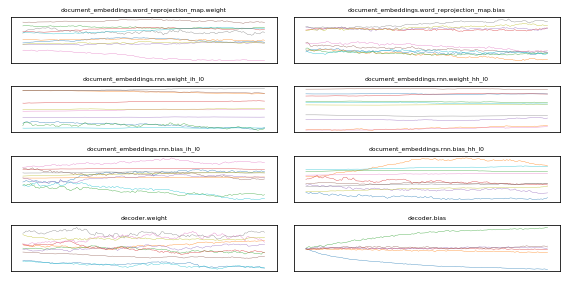

In [251]:
# 8. plot weight traces (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_weights('resources/taggers/ag_news/weights.txt')

## Models